<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Sub_arreglo_maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Max sub-array**

#1. Descripcion del problema

El problema propuesto es el siguiente, se entrega un arreglo de tamaño n el cual contiene una serie de numeros, con estos datos podemos partir este arreglo y encontrar dentro de el un sub-arreglo el cual contenga la mayor suma de estos datos entre si.

* Entrada: un arreglo con una secuencia de números $[a_1,a_2,a_3,...,a_n]$.

* Salida: un par de indices los cuales sean esten posicionados dentro del arreglo original para asi recrear nuestro sub-arreglo, la suma de todos los valores dentro del sub-arreglo.

este problema es bastante diferente a los que hemos visto anteriormente, ya que en este hace falta hacer el mismo analisis que al arreglo original $(A)$ solamente que a las dos particiones creadas $(B,C)$, encontrar los indices de los maximos sub-arreglo de $B$ y $C$, para luego devolver estos indices para encontrar el sub-arreglo maximo de $A$.

Y este este tipo de problema podria ser visto a la hora de querer ver irregularidades en planas de energia o medicas, ya que en estas se puede saber que tanto voltaje en promedio pasa por un circuito o que tantas pulsaciones por segundo realiza el corazon, y cualquier aumento o caida en estos valores serian registradas.

#2. Descripcion del algoritmo

El algoritmo que estaremos utilizando para resolver este problema es uno que usa el paradigma de divide y venceras.

*  ***Divide y venceras*:** la idea del paradigma reside en la idea de que al reducir el tamaño del problema este se vuelve mas facil de resolver, para luego volver en nuestros pasos hasta llegar al problema original.

este algoritmo como bien dice el paradigma va a reducir el tamaño del arreglo original (en este caso se dividira en dos), estos sub-arreglos seran resueltos y a partir de estas soluciones encontraremos la solucion al problema original.

In [2]:
import random
import copy

def subArregloMaximo (A,verbose):
  if(verbose):
    print("se llama a la funcion maxMitad con un arreglo que va desde la posicion ",0," hasta la ",len(A)//2)
    print("o dicho de otra forma el lado izquierdo del arreglo original")
    minB,lulB,sumaB = maxMitad(A[0:len(A)//2],verbose) ##obtener el mayor sub-arreglo izquierdo
    print("se llama a la funcion maxMitad con un arreglo que va desde la posicion ",len(A)//2," hasta la ",len(A))
    print("o dicho de otra forma el lado derecho del arreglo original")
    minC,lulC,sumaC = maxMitad(A[len(A)//2:len(A)],verbose) ##obtener el mayor sub-arreglo derecho
  else:  
    minB,lulB,sumaB = maxMitad(A[0:len(A)//2],verbose) ##obtener el mayor sub-arreglo izquierdo
    minC,lulC,sumaC = maxMitad(A[len(A)//2:len(A)],verbose) ##obtener el mayor sub-arreglo derecho

  if(verbose):
    print("ahora que tenemos ambos sub-arreglos y se indices toma el indice mas bajo y el indice mas alto")
    print("y se busca el mayor sub-arreglo entre ellos \n")
  
  minA,lulA,sumaA = maxMitad(A[lulB:(minC+len(A)//2)],verbose)

  if(verbose):
    print("ahora comparamos a los sub-arreglos para encontrar el mayor entre ellos")
  if(sumaA > sumaB and sumaA > sumaC):
    return minA,lulA,sumaA
  elif(sumaB > sumaC):
    return minB,lulB,sumaB
  return minC,lulC,sumaC



def maxMitad(A,verbose):
  indice_Menor = 0 ##variable que guarda el indice del sub-arreglo con la mayor diferencia
  indice_Mayor = 0 ##variable que guarda el indice del sub-arreglo con la mayor diferencia
  indiceA = 0
  indiceB = 0
  min = 0
  lul = 0
  suma = 0 ## va sumando los valores del arreglos en cada iteracion
  anterior = 0 ## guarda el valor de la iteracion anterior
  diferencia = 0 ## en esta variable se guarda la suma mas grande que haya hasta el momento

  for i in range(0,len(A)):
    suma = suma + A[i]

    if(anterior < suma and anterior != 0):
      if(verbose):
        print("el punto mas bajo de un nuevo sub-arreglo ",anterior)
      min = anterior
      indiceA = i - 1

    elif(anterior > suma and min != 0):
      if(verbose):
        print("el punto mas alto de un nuevo sub-arreglo ",anterior,"\n")
      lul = anterior
      indiceB = i - 1
    
    if(min != 0 and lul != 0):
      min = abs(min) - abs(lul)

      min = abs(min)

      if(verbose):
        print("ahora comparemos el nuevo sub-arreglo con el que hemos encontrado anteriormente para ver quien es mayor")
        print("amplitud de sub-arreglo nuevo: ",min)
        print("amplitud del maximo encontrado hasta el momento: ",diferencia,"\n")
      if(diferencia < min):
        if(verbose):
          print("el nuevo sub-arreglo es mayor asi que lo guardaremos como el mayor y reiniciaremos las variables \n")
        diferencia = min

        indice_Menor = indiceA
        indice_Mayor = indiceB

        min = 0
        lul = 0
        anterior = 0
        suma = 0
      elif(diferencia > min):
        if(verbose):
          print("el sub-arreglo que se encontro anteriormente es mayor asi que seguimos buscando por un sub-arreglo que sea mayor a este \n")
        
        min = 0
        lul = 0
        anterior = 0
        suma = 0

    anterior = suma
  if(verbose):
    print("se encontro el maximo sub-arreglo \n")
    print("Indice menor: ", indice_Menor)
    print("Indice mayor: ", j)
    print("Suma de subarreglo: ", diferencia)
  return indice_Menor, indice_Mayor, diferencia

array = random.sample(range(-20,20),14)
i, j, suma = subArregloMaximo(array,False) # En el grafico de la guia low era el inicio del arreglo y high el final
print("Indice menor: ", i)
print("Indice mayor: ", j)
print("Suma de subarreglo: ", suma)

Indice menor:  2
Indice mayor:  3
Suma de subarreglo:  19


Entonces para recapitular lo voy a detallar el paso a paso de cada funcion:

###2.1.1. Funcion subArregloMaximo

1. la funcion recibe un arreglo de tamaño n junto a su indice inicial, medio y final.

2. esta va a hacer dos llamadas de la funcion **maxMitad** aca una dandole una mitad del arreglo (primera llamada $A[inicio,mitad]$, sengunda llamada $A[mitad,final]$).

3. una vez la funcion **maxMitad** le devuelva los dos indices de los sub-arreglos de ambas mitades, este va a calcular el sub-arreglo medio entre estos dos.

4. la funcion luego va analizar cual sub-arreglo es mayor y lo retornara junto con su valor e indices.

###2.1.2. Funcion maxMitad

1. la funcion al ser llamada por **subArregloMaximo** y esta va a recibir la particion del arreglo y su tamaño maximo.

2. luego este va a empezar a sumar los valores dentro del sub-arreglo hasta encontrar un punto (o indice) en el que estos empiezen a crecer.

3. al encontrar este punto ahora el algoritmo empezara a buscar el punto (o indice) en que dejen de crecer, una vez se encuentra ese punto, ya tenemos los puntos (o indices) ahora tenemos un sub-arreglo candito a ser el que tenga la mayor suma dentro de nuestra particion.

4. ahora lo que se hace es encontrar la diferencia que existe entre el punto mas bajo y el punto mas alto del sub-arreglo.

5. esta diferencia entre los puntos del sub-arreglo la vamos a comparar con la diferencia del sub-arreglo mas grande encontrado hasta el momento.

6. si la diferencia anterior es mayor a la actual, el sub-arreglo anterior sigue siendo el mas grande hasta el momento por lo tanto lo dejamos guardado.

7. si la diferencia anterior es menor a la actual, el sub-arreglo encontrado es mayor al que se tenia guardado previamente, por lo tanto se guarda los indices 
y la diferencia del nuevo sub-arreglo el cual es mas grande encontrado hasta el momento.

8. se repite el proceso desde el $paso 2$ y una vez recorrida toda la particion se devuelven los indices y la diferencia que existe entre ambos a la funcion **subArregloMaximo**.

##2.2. Ejecucion paso a paso

a continuacion se ejecutara el algoritmo viendo el paso a paso de este para resolver un cierto problema, esta opcion se habilita cuando $verbose = True$

In [ ]:
import random

array = random.sample(range(-20,20),14)
i, j, suma = subArregloMaximo(array,True) # En el grafico de la guia low era el inicio del arreglo y high el final
print("Indice menor: ", i)
print("Indice mayor: ", j)
print("Suma de subarreglo: ", suma)

se llama a la funcion maxMitad con un arreglo que va desde la posicion  0  hasta la  7
o dicho de otra forma el lado izquierdo del arreglo original
el punto mas bajo de un nuevo sub-arreglo  12
el punto mas bajo de un nuevo sub-arreglo  21
el punto mas alto de un nuevo sub-arreglo  25 

ahora comparemos el nuevo sub-arreglo con el que hemos encontrado anteriormente para ver quien es mayor
amplitud de sub-arreglo nuevo:  4
amplitud del maximo encontrado hasta el momento:  0 

el nuevo sub-arreglo es mayor asi que lo guardaremos como el mayor y reiniciaremos las variables 

se encontro el maximo sub-arreglo 

Indice menor:  1
Indice mayor:  5
Suma de subarreglo:  4
se llama a la funcion maxMitad con un arreglo que va desde la posicion  7  hasta la  14
o dicho de otra forma el lado derecho del arreglo original
el punto mas bajo de un nuevo sub-arreglo  10
el punto mas bajo de un nuevo sub-arreglo  12
el punto mas alto de un nuevo sub-arreglo  18 

ahora comparemos el nuevo sub-arreglo con

#3. Tiempo de Ejecucción

El problema del subarreglo máximo puede ser implementado de distintas maneras, cada manera con un tiempo de ejecución distinto a los anteriores pero ninguno de estos depende del como esten los datos, quiero decir que no existe diferencia alguna entre un supuesto $mejor$ o $peor$ caso, ambos presentan el mismo tiempo de ejecucción. Esto es debido a que no existen situaciones en ambos casos que produzcan que ocurran más iteraciones o menos. 
La forma en que fue implementado este algoritmo antes es llamada "divide y vencerás", esto significa que el arreglo se va a dividir recursivamente a la mitad y cuando no pueda seguír dividiendose se van a comenzar a sumar sus valores para buscar la suma mayor a medida que se van volviendo a unir los subarreglos.
Por la forma en que esto se realiza, dividir constantemente para luego recorrer todos estos datos de forma lineal, tenemos que esta forma de implementación tiene la forma de $T(n) = 2T(n/2) + O(n)$ que es equivalente a $O(nlogn)$.

# 4. Correctitud
## Teorema
El algoritmo *maxSubArray* recibe un arreglo de n elementos y retorna el subarreglo que contiene el valor máximo al sumar todos sus elementos contiguos.

## Prueba del teorema
**Caso base:** Cuando sólo hay un elemento en el arreglo, el elemento máximo es el único que contiene. Por lo tanto, retorna este elemento.

**Caso general (n>1):** Se asume que *maxSubArray* es correcto si el tamaño del arreglo es m < n.

El algoritmo divide el arreglo en 2 mitades de largo n/2 si n > 1, y luego las procesa utilizando el mismo algoritmo. Como el tamaño de los algoritmos es menor a la del arreglo original, se cumple que m < n.

#5. Experimentos

##5.1. Comparacion del algoritmo

En este experimento vamos a comparar el algorimo creado en este informe con el algoritmo kadane, este algoritmo lleva a cabo la misma tarea que el algoritmo max sub-array, pero a diferencia de este kadane no es recursivo.

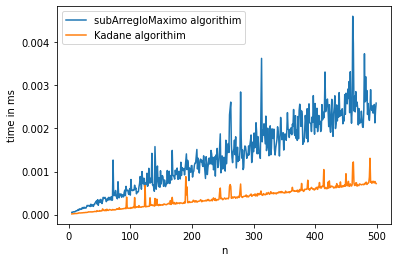

In [18]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(-1000, 1000), n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import subArregloMaximo", stmt=f"subArregloMaximo({a}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import maxSubArraySum", stmt=f"maxSubArraySum({a},{len(a)})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)


plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["subArregloMaximo algorithim", "Kadane algorithim"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Analisis

Como se apreciar el algoritmo kadane es mas efectivo que el metodo recursivo, y se intenta decir cual es la complejidad de este algoritmo, entonces es probable que este sea $O(n)$ mientras que el metodo recusivo posiblemente sea $O(n log(n)$.

##5.2. Correctitud de los valores entregados por el algoritmo



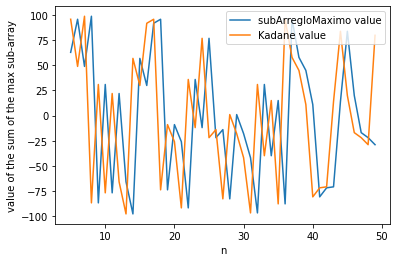

In [19]:
import matplotlib.pyplot as plt
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,50):

  a = random.sample(range(-100, 100), n)
  
  min,lul,suma = subArregloMaximo(a,False)

  x.append(n)
  y.append(sum)

  sum = kadane(a,len(a))

  x1.append(n)
  y1.append(sum)


plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["subArregloMaximo value", "Kadane value"])

plt.xlabel('n')
plt.ylabel('value of the sum of the max sub-array')
plt.show()

###Analisis

como se puede ver en la grafica, el algoritmo replica la grafica del **algoritmo kadane** pero este desplaza sus valores a la derecha, este comportamiento es bastante inusual, ya que o el algoritmo deberia dar los mismos valores que el **algorimo kadane** o estar por encima o por debajo de este.

podemos decir que el **algoritmo kadane** y el **algoritmo fuerza bruta** dan los valores correctos, ya que es un algoritmo ya evaluado y conocido por su eficazia y eficiencia.

desconozco el motivo por el cual el **algoritmo subArregloMaximo** este comportandose de esta forma, el motivo que encuentro mas probable es que esto ocurra debido a los indices que se le entregan al algoritmo **maxMitad**


#6. Anexos

##6.1. Algorimo kadene

El codigo que se ve a continuacion es una implementacion del algoritmo kadene necesario para poder hacer el experimento 5.1.

In [6]:
# Python program to print largest contiguous array sum
  
from sys import maxsize
  
# Function to find the maximum contiguous subarray
# and print its starting and end index
def maxSubArraySum(a,size):
  
    max_so_far = -maxsize - 1
    max_ending_here = 0
    start = 0
    end = 0
    s = 0
  
    for i in range(0,size):
  
        max_ending_here += a[i]
  
        if max_so_far < max_ending_here:
            max_so_far = max_ending_here
            start = s
            end = i
  
        if max_ending_here < 0:
            max_ending_here = 0
            s = i+1
  
    # print ("Maximum contiguous sum is %d"%(max_so_far))
    # print ("Starting Index %d"%(start))
    # print ("Ending Index %d"%(end))
  
# Driver program to test maxSubArraySum
a = [-2, -3, 4, -1, -2, 1, 5, -3]
maxSubArraySum(a,len(a))